In [2]:
#image = "/Users/avkashchauhan/Downloads/goldfish1.jpg"
image = "/Users/avkashchauhan/learn/workshop2017/recognize-me.jpg"

In [3]:
from deeputil.imageassist import ImageUtils

Using TensorFlow backend.


Now importing selected image from the disk with default size (256, 256) ...


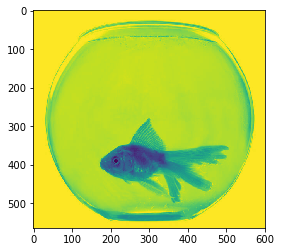

Now importing selected image from the disk...
Image as array shape:
Now pre-processing the image to get ready for classification..


In [4]:
ImageUtils.display_image_from_disk(image)
img = ImageUtils.import_image_from_disk(image, (224,224), isGray= False)
img_array = ImageUtils.convert_image_array(img)
img_p = ImageUtils.preprocess_image_array(img_array)

In [5]:
import tensorflow
from deeputil.model import ModelsMaster
from deeputil.modelassist import KerasModelHelper

In [5]:
v16 = ModelsMaster.get_vgg16_model()

VGG16 model is ~0.5GB, make sure you have time and space...


In [4]:
Iv3 = ModelsMaster.get_inceptionV3_model()

Inception V3 model is about ~0.5GB, so make sure you have time and space to make it happen....


In [6]:
KerasModelHelper.get_model_input_image_shape_info(v16)

Now getting very first layer from model..
The layer Input Shape is (None, 224, 224, 3)
You would need to import image of this size - (224, 224, 3)


(None, 224, 224, 3)

In [8]:
KerasModelHelper.get_model_layers_details_all(v16)

Total 23 layers details are collected.


,Id,LayerName,Type,Filters,InputShape,OutputShape,Activation,ParameterCount
0,0,input_1,InputLayer,0,"(None, 224, 224, 3)","(None, 224, 224, 3)",None,0
1,1,block1_conv1,Conv2D,64,"(None, 224, 224, 3)","(None, 224, 224, 64)",relu,1792
2,2,block1_conv2,Conv2D,64,"(None, 224, 224, 64)","(None, 224, 224, 64)",relu,36928
3,3,block1_pool,MaxPooling2D,0,"(None, 224, 224, 64)","(None, 112, 112, 64)",None,0
4,4,block2_conv1,Conv2D,128,"(None, 112, 112, 64)","(None, 112, 112, 128)",relu,73856
5,5,block2_conv2,Conv2D,128,"(None, 112, 112, 128)","(None, 112, 112, 128)",relu,147584
6,6,block2_pool,MaxPooling2D,0,"(None, 112, 112, 128)","(None, 56, 56, 128)",None,0
7,7,block3_conv1,Conv2D,256,"(None, 56, 56, 128)","(None, 56, 56, 256)",relu,295168
8,8,block3_conv2,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080
9,9,block3_conv3,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080


In [11]:
from deeputil.modelassist import ImportExport

In [12]:
model = ImportExport.import_keras_model_config_and_weight_and_compile('/Users/avkashchauhan/learn/deepwater/x.json', 
                                                                      '/Users/avkashchauhan/learn/deepwater/x.h5',
                                                                      show_info = True,)

Losses: categorical_crossentropy
Optimizers: rmsprop
Metrics: ['acc']
Loading model json from the disk done..
Loading model weights from the disk done.


In [9]:
KerasModelHelper.get_model_layers_details_all_extended(v16, img_p, show_info=False)

,Id,LayerName,Type,Filters,InputShape,OutputShape,Activation,ParameterCount,Act_Shape,FeatureMapSize,FeatureMapCount
0,0,input_1,InputLayer,NaN,"(None, 224, 224, 3)","(None, 224, 224, 3)",None,0,"(1, 224, 224, 3)","(224, 3)",3
1,1,block1_conv1,Conv2D,64,"(None, 224, 224, 3)","(None, 224, 224, 64)",relu,1792,"(1, 224, 224, 64)","(224, 64)",64
2,2,block1_conv2,Conv2D,64,"(None, 224, 224, 64)","(None, 224, 224, 64)",relu,36928,"(1, 224, 224, 64)","(224, 64)",64
3,3,block1_pool,MaxPooling2D,NaN,"(None, 224, 224, 64)","(None, 112, 112, 64)",None,0,"(1, 112, 112, 64)","(112, 64)",64
4,4,block2_conv1,Conv2D,128,"(None, 112, 112, 64)","(None, 112, 112, 128)",relu,73856,"(1, 112, 112, 128)","(112, 128)",128
5,5,block2_conv2,Conv2D,128,"(None, 112, 112, 128)","(None, 112, 112, 128)",relu,147584,"(1, 112, 112, 128)","(112, 128)",128
6,6,block2_pool,MaxPooling2D,NaN,"(None, 112, 112, 128)","(None, 56, 56, 128)",None,0,"(1, 56, 56, 128)","(56, 128)",128
7,7,block3_conv1,Conv2D,256,"(None, 56, 56, 128)","(None, 56, 56, 256)",relu,295168,"(1, 56, 56, 256)","(56, 256)",256
8,8,block3_conv2,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080,"(1, 56, 56, 256)","(56, 256)",256
9,9,block3_conv3,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080,"(1, 56, 56, 256)","(56, 256)",256


In [ ]:
KerasModelHelper.get_model_layers_details_all(model, show_info=False)

In [ ]:
KerasModelHelper.get_model_input_image_shape_info(model, show_info=True)

In [ ]:
from deeputil.imageassist import ImageUtils

In [ ]:
img_path = "/Users/avkashchauhan/learn/deepwater/dog-bw.jpg"

In [ ]:
img = ImageUtils.import_image_from_disk(img_path, (224,224), isGray= False)
img_array = ImageUtils.convert_image_array(img)
img_p = ImageUtils.preprocess_image_array(img_array)

In [ ]:
KerasModelHelper.get_model_layers_details_all_extended(model, img_p, show_info=False)

In [10]:
KerasModelHelper.get_model_layer_details_by_layerId(v16, 0, show_info=False)

Layer Id : 0
Layer Name : input_1
Layer Type : InputLayer
Layer filters : NaN
Layer Number : 0
Layer Input Shape : (None, 224, 224, 3)
Layer output shape :(None, 224, 224, 3)
Num of Parameters :0


In [21]:
KerasModelHelper.get_feature_map_counts_for_all_layers(v16, img_p)

Now collecting feature maps for all layers in the given model..
Feature maps for all layers are collected.


,LayerId,FeatureMapCount
0,0,3
1,1,64
2,2,64
3,3,64
4,4,128
5,5,128
6,6,128
7,7,256
8,8,256
9,9,256


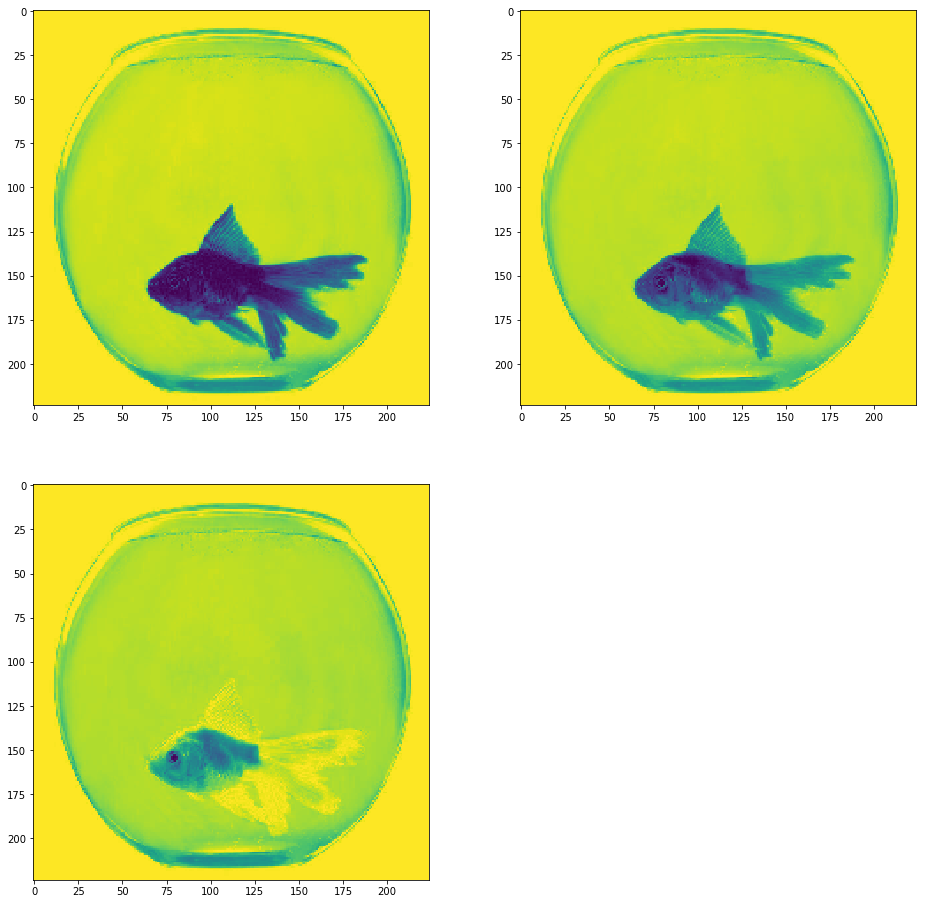

In [11]:
KerasModelHelper.display_full_feature_map_for_selected_layer_in_model(v16, 0, img_p, show_info=False)

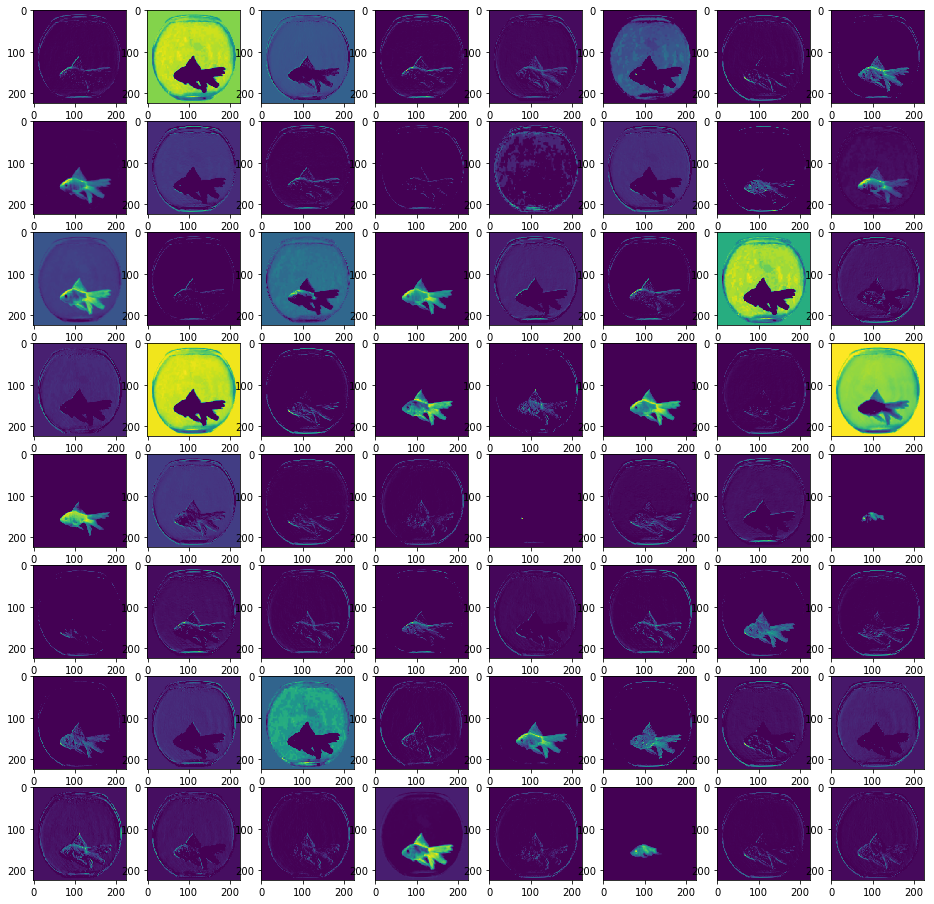

In [12]:
KerasModelHelper.display_full_feature_map_for_selected_layer_in_model(v16, 1, img_p, show_info=False)

Now collecting feature map for the selected layer in the given model..


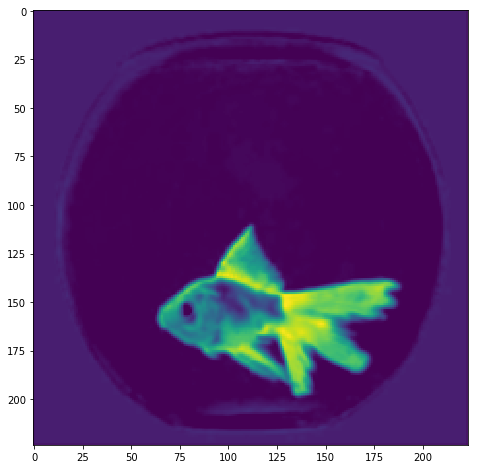

You are watching feature map #59 from the layer #1.


In [15]:
KerasModelHelper.display_individual_feature_for_selected_layer_in_model(v16,1, 59, img_p)